# Setup and Context

### Introduction

On November 27, 1895, Alfred Nobel signed his last will in Paris. When it was opened after his death, the will caused a lot of controversy, as Nobel had left much of his wealth for the establishment of a prize.

Alfred Nobel dictates that his entire remaining estate should be used to endow “prizes to those who, during the preceding year, have conferred the greatest benefit to humankind”.

Every year the Nobel Prize is given to scientists and scholars in the categories chemistry, literature, physics, physiology or medicine, economics, and peace. 

<img src=https://i.imgur.com/36pCx5Q.jpg>

Let's see what patterns we can find in the data of the past Nobel laureates. What can we learn about the Nobel prize and our world more generally?

### Upgrading plotly (only Google Colab Notebook) if necessary

In [1]:
# %pip install --upgrade plotly

### Import Statements

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

### Read the Data

In [4]:
df_data = pd.read_csv('data/nobel_prize_data.csv')

The exact birth dates for Michael Houghton, Venkatraman Ramakrishnan, and Nadia Murad are unknown.


# Data Exploration & Cleaning

Preliminary data exploration. 
* What is the shape of `df_data`? How many rows and columns?
* What are the column names?
* In which year was the Nobel prize first awarded?
* Which year is the latest year included in the dataset?

In [5]:
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE


In [6]:
print(f"shape of the data set: {df_data.shape}")

shape of the data set: (962, 16)


In [7]:
df_data.columns

Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

In [8]:
df_data.tail()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
957,2020,Medicine,The Nobel Prize in Physiology or Medicine 2020,“for the discovery of Hepatitis C virus”,1/3,Individual,Michael Houghton,1949-07-02,NaN,United Kingdom,United Kingdom,Male,University of Alberta,Edmonton,Canada,GBR
958,2020,Peace,The Nobel Peace Prize 2020,"“for its efforts to combat hunger, for its con...",1/1,Organization,World Food Programme (WFP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
959,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Andrea Ghez,1965-06-16,"New York, NY",United States of America,United States of America,Female,University of California,"Berkeley, CA",United States of America,USA
960,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery of a supermassive compact o...,1/4,Individual,Reinhard Genzel,1952-03-24,Bad Homburg vor der Höhe,Germany,Germany,Male,University of California,"Los Angeles, CA",United States of America,DEU
961,2020,Physics,The Nobel Prize in Physics 2020,“for the discovery that black hole formation i...,1/2,Individual,Roger Penrose,1931-08-08,Colchester,United Kingdom,United Kingdom,Male,University of Oxford,Oxford,United Kingdom,GBR


**Checking for**: 
* duplicate values in the dataset?
* NaN values in the dataset?
* columns that tend to have NaN values?
* Count of NaN values per column? 
* Why do these columns have NaN values?  

### Check for Duplicates

In [9]:
print(f"Any duplicates: {df_data.duplicated().values.any()}")
print(f"Any NaN values among the data: {df_data.isna().values.any()}")

Any duplicates: False
Any NaN values among the data: True


### Check for NaN Values

In [10]:
# counts NaN values per column
df_data.isna().sum()

year                       0
category                   0
prize                      0
motivation                88
prize_share                0
laureate_type              0
full_name                  0
birth_date                28
birth_city                31
birth_country             28
birth_country_current     28
sex                       28
organization_name        255
organization_city        255
organization_country     254
ISO                       28
dtype: int64

Exploring the NaN values in the columns 

Checking the NaN vales in birth year

In [11]:
col_subsets = ['year','category', 'laureate_type',
              'birth_date','full_name', 'organization_name']
df_data.loc[df_data.birth_date.isna()][col_subsets][:7]

,year,category,laureate_type,birth_date,full_name,organization_name
24,1904,Peace,Organization,NaN,Institut de droit international (Institute of ...,NaN
60,1910,Peace,Organization,NaN,Bureau international permanent de la Paix (Per...,NaN
89,1917,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
200,1938,Peace,Organization,NaN,Office international Nansen pour les Réfugiés ...,NaN
215,1944,Peace,Organization,NaN,Comité international de la Croix Rouge (Intern...,NaN
237,1947,Peace,Organization,NaN,American Friends Service Committee (The Quakers),NaN
238,1947,Peace,Organization,NaN,Friends Service Council (The Quakers),NaN


Checking the NaN vales in organization name

In [12]:
col_subset = ['year','category', 'laureate_type','full_name', 'organization_name']
df_data.loc[df_data.organization_name.isna()][col_subset][:7]

,year,category,laureate_type,full_name,organization_name
1,1901,Literature,Individual,Sully Prudhomme,NaN
3,1901,Peace,Individual,Frédéric Passy,NaN
4,1901,Peace,Individual,Jean Henry Dunant,NaN
7,1902,Literature,Individual,Christian Matthias Theodor Mommsen,NaN
9,1902,Peace,Individual,Charles Albert Gobat,NaN
10,1902,Peace,Individual,Élie Ducommun,NaN
14,1903,Literature,Individual,Bjørnstjerne Martinus Bjørnson,NaN


### Type Conversions

 
* Converting the `birth_date` column to Pandas `Datetime` objects
* Adding a Column called `share_pct` which has the laureates' share as a percentage in the form of a floating-point number.

#### Convert Year and Birth Date to Datetime

In [13]:
df_data.birth_date = pd.to_datetime(df_data.birth_date)
print(type(df_data.birth_date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


#### Add a Column with the Prize Share as a Percentage

In [14]:
separated_values = df_data.prize_share.str.split("/", expand=True)
numerator = pd.to_numeric(separated_values[0])
denomenator = pd.to_numeric(separated_values[1])
df_data["share_pct"] = numerator / denomenator


In [15]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   962 non-null    int64         
 1   category               962 non-null    object        
 2   prize                  962 non-null    object        
 3   motivation             874 non-null    object        
 4   prize_share            962 non-null    object        
 5   laureate_type          962 non-null    object        
 6   full_name              962 non-null    object        
 7   birth_date             934 non-null    datetime64[ns]
 8   birth_city             931 non-null    object        
 9   birth_country          934 non-null    object        
 10  birth_country_current  934 non-null    object        
 11  sex                    934 non-null    object        
 12  organization_name      707 non-null    object        
 13  organ

# Plotly Donut Chart: Percentage of Male vs. Female Laureates

Creating a [donut chart using plotly](https://plotly.com/python/pie-charts/) which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [17]:
biology = df_data.sex.value_counts()

fig = px.pie(
        labels=biology.index, 
        values=biology.values,
        title="Percentage of Male vs. Female Winners",
        names=biology.index,
        hole=0.4,
)

fig.update_traces(
    textposition='inside',
    textfont_size=15,
    textinfo='percent',
)

fig.show()

d:\working_directory\01-BOOTCAMPS\02-100 Days of Code - The Complete Python Pro Bootcamp (Udemy)\78-Day - Pandas - Plotly_Matplotlib_Seaborn-Nobel_Prize\ENV\Lib\site-packages\plotly\express\_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



# Who were the first 3 Women to Win the Nobel Prize?

Checking:
* What are the names of the first 3 female Nobel laureates? 
* What did the win the prize for? 


In [19]:
df_data[df_data.sex == 'Female'].sort_values("year", ascending=True)[:3]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
18,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Poland,Female,NaN,NaN,NaN,POL,0.25
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE,1.00
51,1909,Literature,The Nobel Prize in Literature 1909,"""in appreciation of the lofty idealism, vivid ...",1/1,Individual,Selma Ottilia Lovisa Lagerlöf,1858-11-20,Mårbacka,Sweden,Sweden,Female,NaN,NaN,NaN,SWE,1.00


# Find the Repeat Winners

Checking: If some people get a Nobel Prize more than once.

In [20]:
is_winner = df_data.duplicated(subset=["full_name"], keep=False)
multiple_winners = df_data[is_winner]
print(f"There are {multiple_winners.full_name.unique()} \
    winners who were awarded the prize more than once.")

There are ['Marie Curie, née Sklodowska'
 'Comité international de la Croix Rouge (International Committee of the Red Cross)'
 'Linus Carl Pauling'
 'Office of the United Nations High Commissioner for Refugees (UNHCR)'
 'John Bardeen' 'Frederick Sanger']     winners who were awarded the prize more than once.


In [21]:
col_subset = ['year', 'category', 'laureate_type', 'full_name']
multiple_winners[col_subset]

,year,category,laureate_type,full_name
18,1903,Physics,Individual,"Marie Curie, née Sklodowska"
62,1911,Chemistry,Individual,"Marie Curie, née Sklodowska"
89,1917,Peace,Organization,Comité international de la Croix Rouge (Intern...
215,1944,Peace,Organization,Comité international de la Croix Rouge (Intern...
278,1954,Chemistry,Individual,Linus Carl Pauling
283,1954,Peace,Organization,Office of the United Nations High Commissioner...
297,1956,Physics,Individual,John Bardeen
306,1958,Chemistry,Individual,Frederick Sanger
340,1962,Peace,Individual,Linus Carl Pauling
348,1963,Peace,Organization,Comité international de la Croix Rouge (Intern...


# Number of Prizes per Category

Checking:
* In how many categories are prizes awarded? 
* Create a plotly bar chart with the number of prizes awarded by category. 
* Which category has the most number of prizes awarded? 
* Which category has the fewest number of prizes awarded? 

In [24]:
prizes_per_category = df_data.category.value_counts()

v_bar = px.bar(
    x = prizes_per_category.index,
    y = prizes_per_category.values,
    color = prizes_per_category.values,
    color_continuous_scale='Aggrnyl',
    title="Number of Prizes Awarded per Category",
)

v_bar.update_layout(
    xaxis_title='Nobel Prize Category', 
    coloraxis_showscale=False,
    yaxis_title='Number of Prizes',
)

v_bar.show()

the first prize in the field of Economics and who did it go to?

In [25]:
df_data[df_data.category == 'Economics'].sort_values('year')[:3]

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct
393,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Jan Tinbergen,1903-04-12,the Hague,Netherlands,Netherlands,Male,The Netherlands School of Economics,Rotterdam,Netherlands,NLD,0.50
394,1969,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having developed and applied dynamic mode...",1/2,Individual,Ragnar Frisch,1895-03-03,Oslo,Norway,Norway,Male,University of Oslo,Oslo,Norway,NOR,0.50
402,1970,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for the scientific work through which he has ...",1/1,Individual,Paul A. Samuelson,1915-05-15,"Gary, IN",United States of America,United States of America,Male,Massachusetts Institute of Technology (MIT),"Cambridge, MA",United States of America,USA,1.00


# Male and Female Winners by Category

Creating a [plotly bar chart](https://plotly.com/python/bar-charts/) that shows the split between men and women by category. 
* Hover over the bar chart for details

In [32]:
cat_men_women = df_data.groupby(
                            ['category', 'sex'], 
                            as_index=False).agg(
                                            {'prize': pd.Series.count}
                        )
cat_men_women.sort_values('prize', ascending=False, inplace=True)
cat_men_women.head()

,category,sex,prize
11,Physics,Male,212
7,Medicine,Male,210
1,Chemistry,Male,179
5,Literature,Male,101
9,Peace,Male,90


In [33]:
v_bar_split = px.bar(
    x = cat_men_women.category,
    y = cat_men_women.prize,
    color = cat_men_women.sex,
    title = 'Number of Prizes Awarded per Category split by Men and Women'
)

v_bar_split.update_layout(
    xaxis_title='Nobel Prize Category', 
    yaxis_title='Number of Prizes',
)

v_bar_split.show()

# Number of Prizes Awarded Over Time

Are more prizes awarded recently than when the prize was first created? Showing the trend in awards visually. 
* Counting the number of prizes awarded every year. 
* Creating a 5 year rolling average of the number of prizes.
* Using Matplotlib superimpose the rolling average on a scatter plot.
* Showing a tick mark on the x-axis for every 5 years from 1900 to 2020. 
* Using the [named colours](https://matplotlib.org/3.1.0/gallery/color/named_colors.html) to draw the data points in `dogerblue` while the rolling average is coloured in `crimson`. 


Key things to consider
* Looking at the chart, did the first and second world wars have an impact on the number of prizes being given out? 
* What could be the reason for the trend in the chart?


In [37]:
prize_per_year = df_data.groupby("year").count().prize
# 5 year moving average
moving_average = prize_per_year.rolling(window=5).mean()

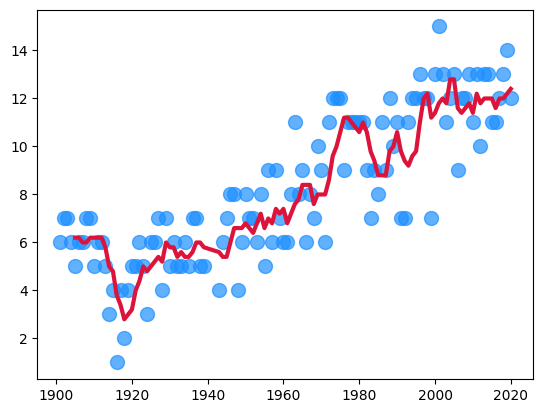

In [38]:
plt.scatter(
    x=prize_per_year.index,
    y=prize_per_year.values,
    c='dodgerblue',
    alpha=0.7,
    s=100,
)


plt.plot(
    prize_per_year.index,
    moving_average.values,
    c='crimson',
    linewidth=3,
)

plt.show()

adding styling to the above chart

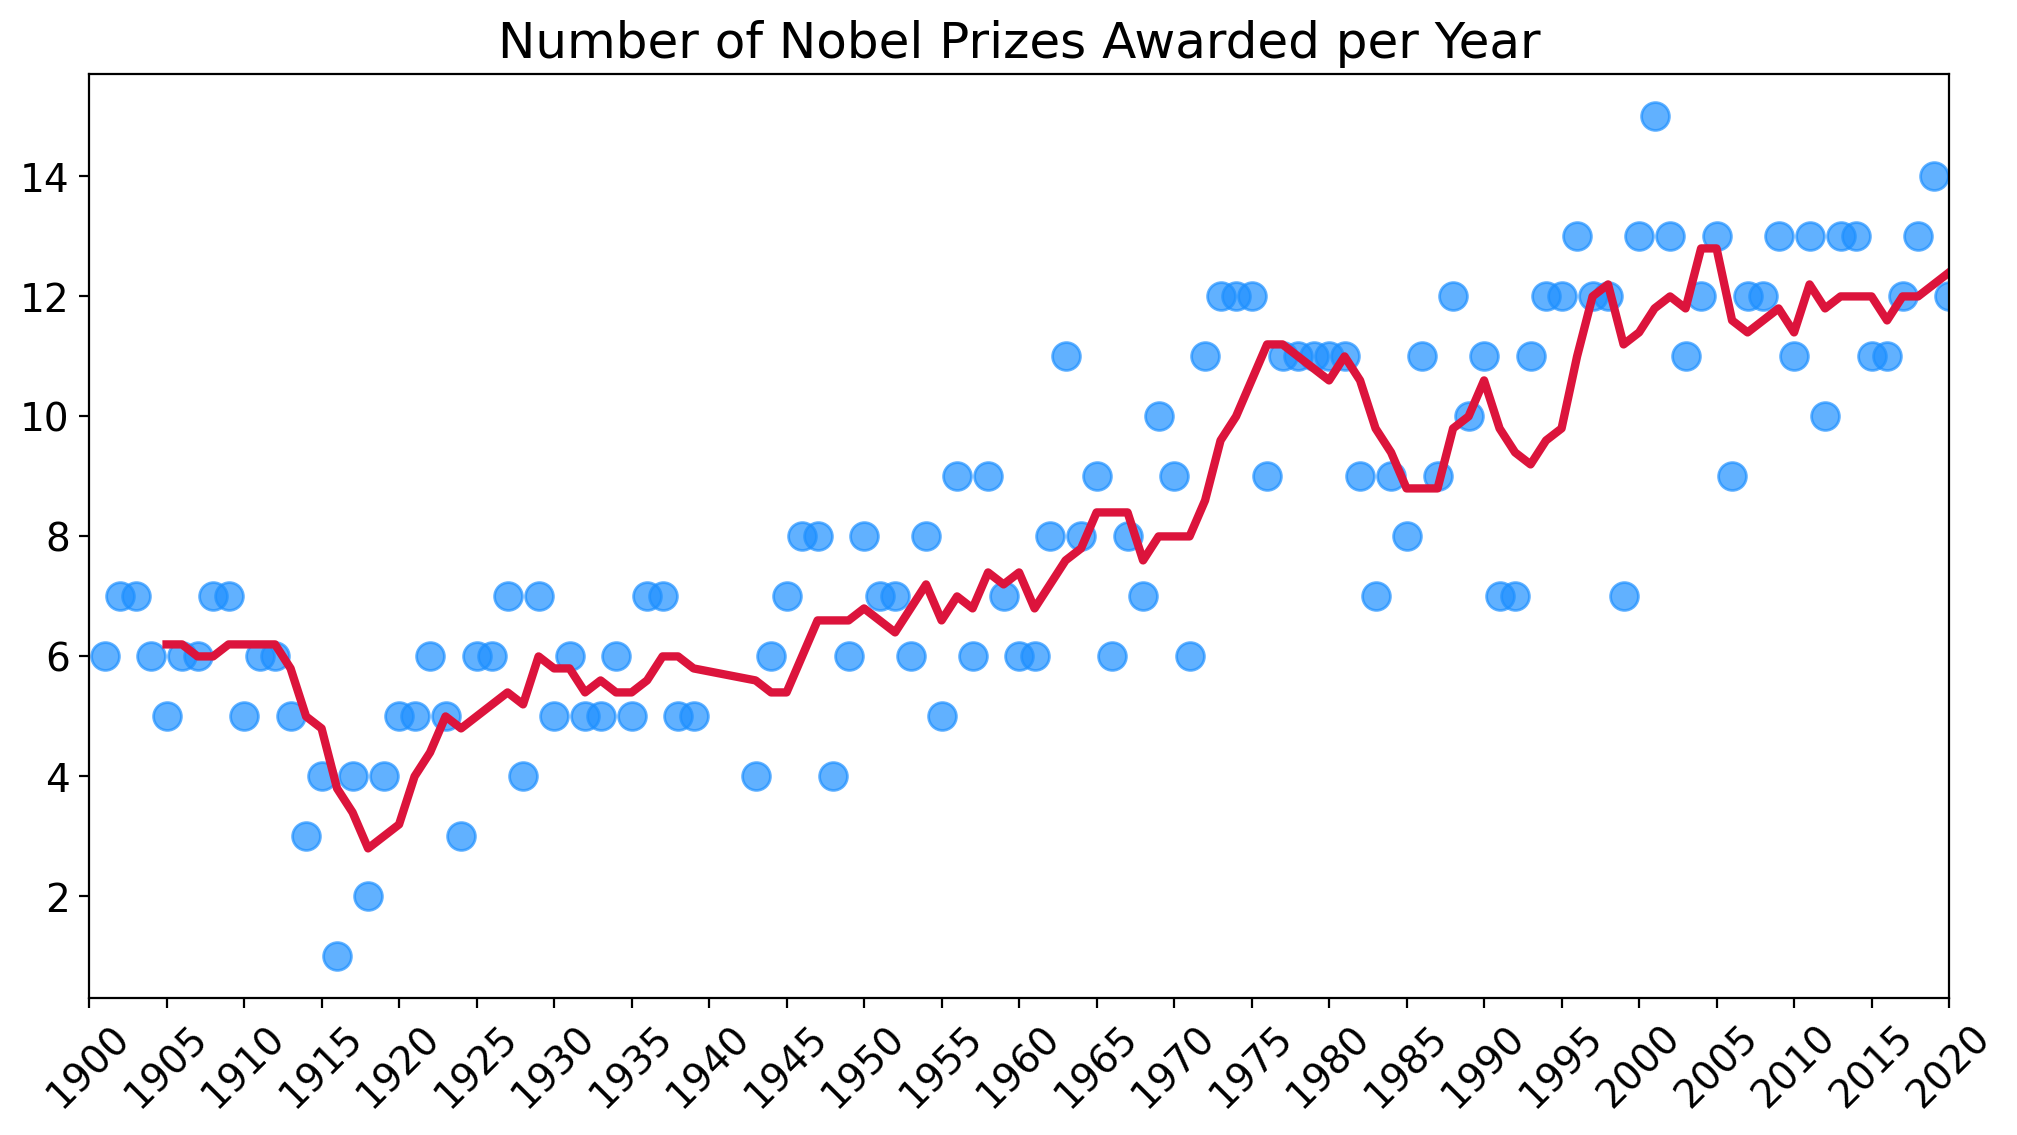

In [40]:
plt.figure(figsize=(12,6), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(
    ticks=np.arange(1900, 2021, step=5),
    fontsize=14, 
    rotation=45
) 

# get curetn axes
ax = plt.gca()
ax.set_xlim(1900, 2020)

ax.scatter(
    x=prize_per_year.index,
    y=prize_per_year.values,
    c='dodgerblue',
    alpha=0.7,
    s=100,
)


ax.plot(
    prize_per_year.index,
    moving_average.values,
    c='crimson',
    linewidth=3,
)

plt.show()

# Are More Prizes Shared Than Before?

Investigating if more prizes are shared than before. 

* Calculating the average prize share of the winners on a year by year basis.
* Calculating the 5 year rolling average of the percentage share.
* Modifing the code to add a secondary axis to the Matplotlib chart.
* Ploting the rolling average of the prize share on this chart. 
* Inverting the secondary y-axis to make the relationship even more clear. 

In [41]:
yearly_avg_share = df_data.groupby(by='year').agg(
                                                {'share_pct': pd.Series.mean}
)
share_moving_average = yearly_avg_share.rolling(window=5).mean()

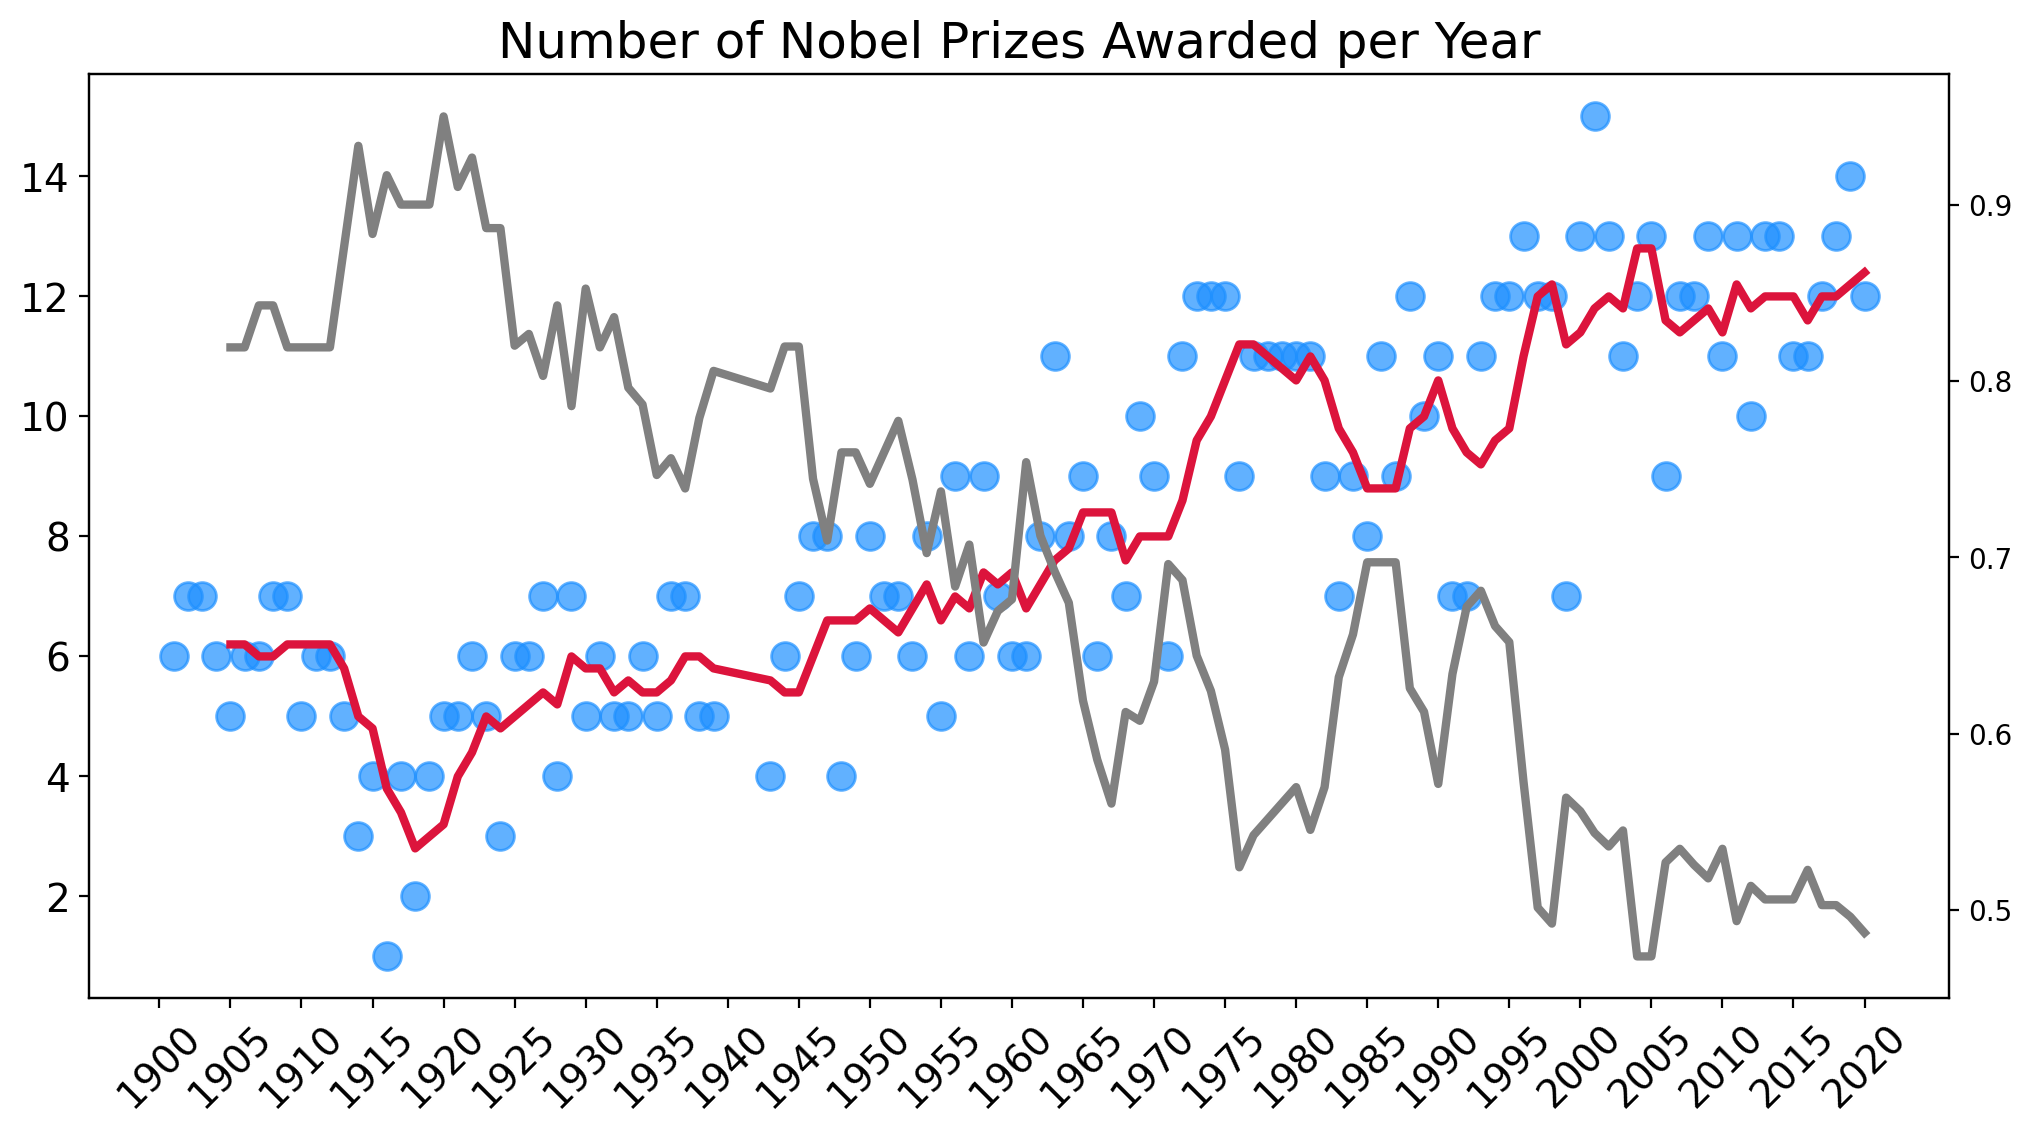

In [42]:
plt.figure(figsize=(12,6), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(
    ticks=np.arange(1900, 2021, step=5),
    fontsize=14, 
    rotation=45
) 

# get curetn axes
ax1 = plt.gca()
# create second y-axis
ax2 = ax1.twinx() 
ax.set_xlim(1900, 2020)

ax1.scatter(
    x=prize_per_year.index,
    y=prize_per_year.values,
    c='dodgerblue',
    alpha=0.7,
    s=100,
)


ax1.plot(
    prize_per_year.index,
    moving_average.values,
    c='crimson',
    linewidth=3,
)

# Adding prize share plot on second axis
ax2.plot(
    prize_per_year.index, 
    share_moving_average.values, 
    c='grey', 
    linewidth=3,
)

plt.show()

Inverting the second y-axis to see better the relationship between the number of prizes and the laureate share.

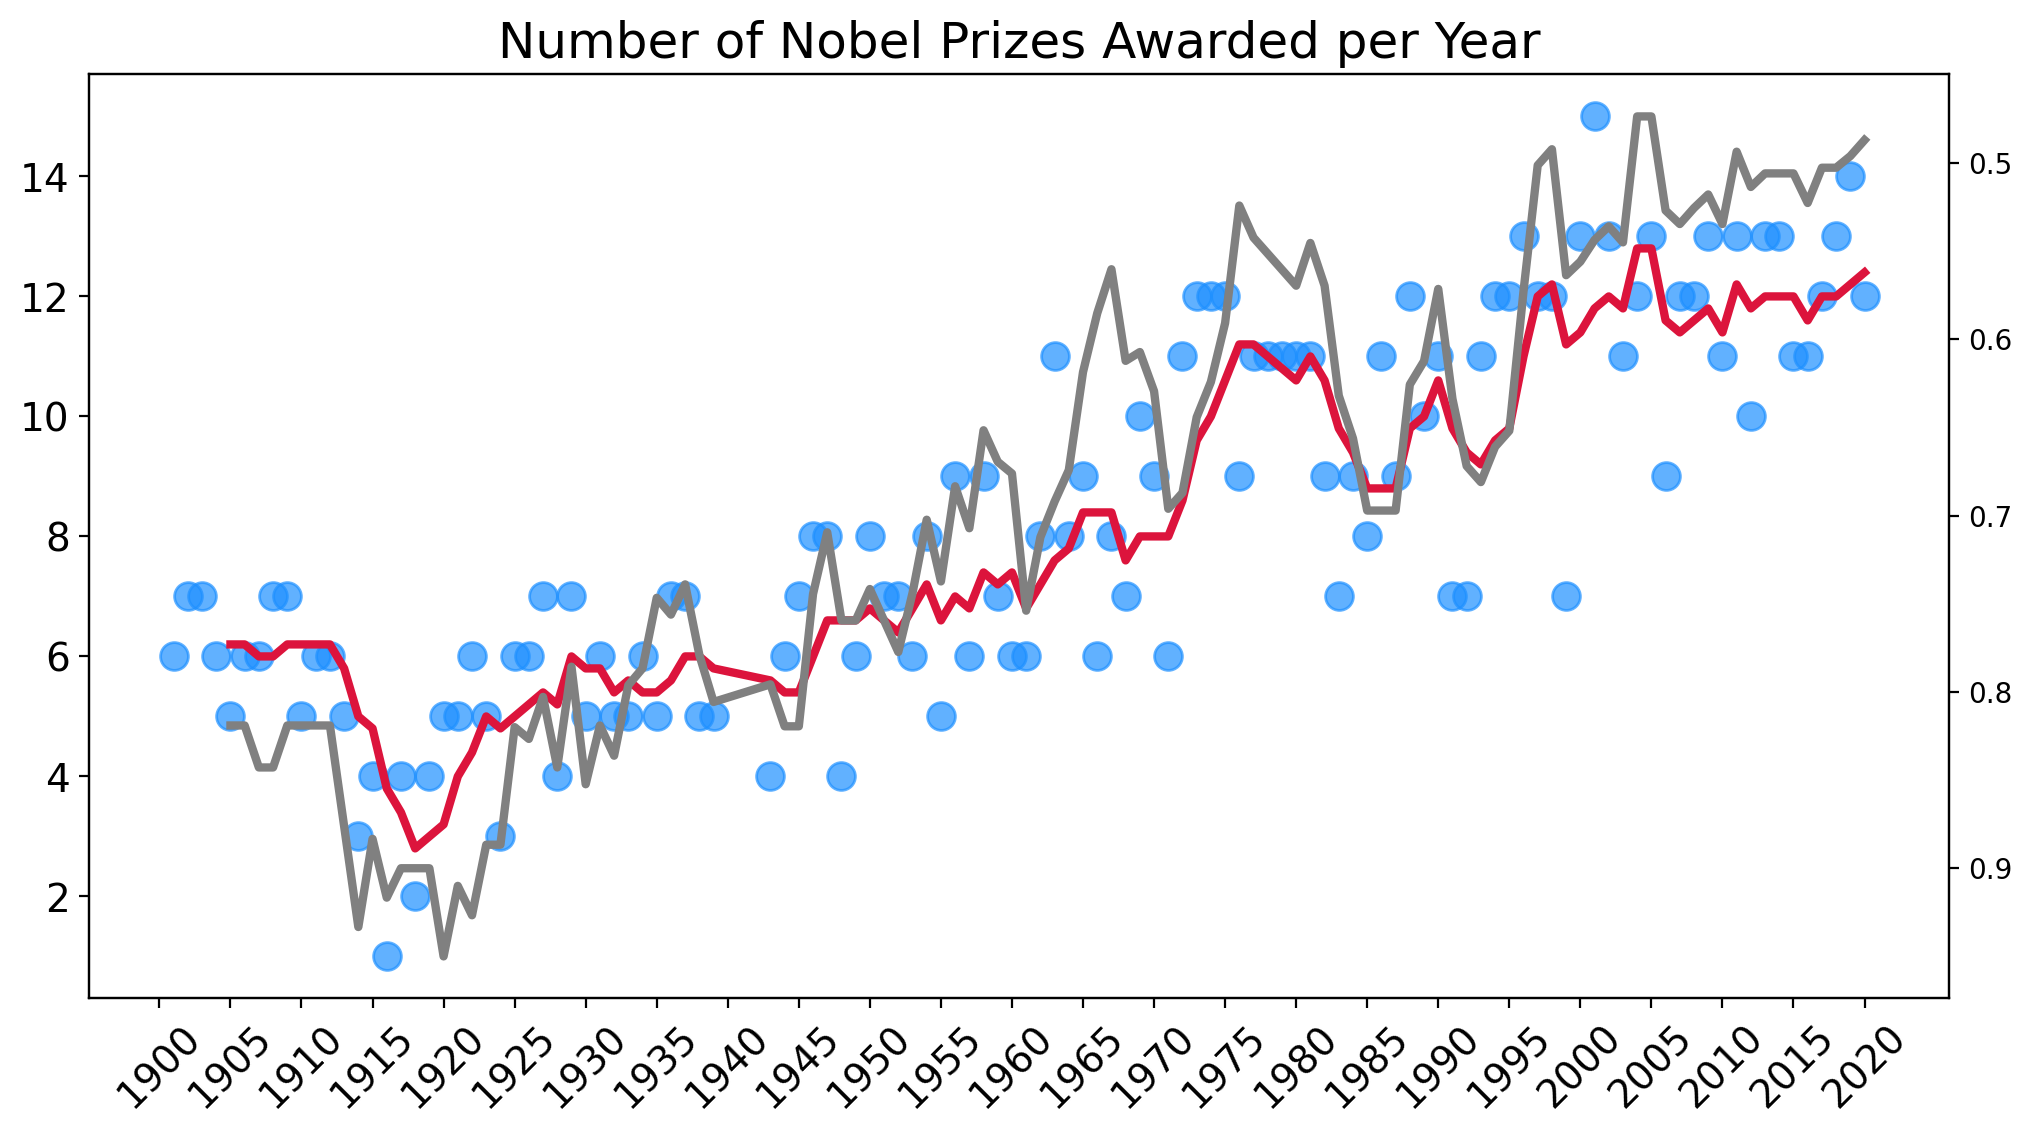

In [43]:
plt.figure(figsize=(12,6), dpi=200)
plt.title('Number of Nobel Prizes Awarded per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(
    ticks=np.arange(1900, 2021, step=5),
    fontsize=14, 
    rotation=45
) 

# get curetn axes
ax1 = plt.gca()
# create second y-axis
ax2 = ax1.twinx() 
ax.set_xlim(1900, 2020)

# inverting y axis
ax2.invert_yaxis()

ax1.scatter(
    x=prize_per_year.index,
    y=prize_per_year.values,
    c='dodgerblue',
    alpha=0.7,
    s=100,
)


ax1.plot(
    prize_per_year.index,
    moving_average.values,
    c='crimson',
    linewidth=3,
)

# Adding prize share plot on second axis
ax2.plot(
    prize_per_year.index, 
    share_moving_average.values, 
    c='grey', 
    linewidth=3,
)

plt.show()

# The Countries with the Most Nobel Prizes

Creating a Pandas DataFrame called `top20_countries` that has the two columns. The `prize` column should contain the total number of prizes won. 


* Using plotly to create a horizontal bar chart showing the number of prizes won by each country. 
* What is the ranking for the top 20 countries in terms of the number of prizes?

In [75]:
top20_countries = df_data.groupby(
    ['birth_country_current'], 
    as_index=False).agg(
                        {'prize': pd.Series.count}
                        )

top20_countries.sort_values(by='prize', inplace=True)
top20_countries = top20_countries[-20:]
top20_countries.tail()

,birth_country_current,prize
67,Sweden,29
25,France,57
26,Germany,84
73,United Kingdom,105
74,United States of America,281


In [77]:
h_bar = px.bar(
    x = top20_countries.prize,
    y = top20_countries.birth_country_current,
    orientation='h',
    color=top20_countries.prize,
    color_continuous_scale='Viridis',
    title='Top 20 Countries by Number of Prizes',
)

h_bar.update_layout(
    xaxis_title = "Number of Prizes",
    yaxis_title = "Coutry",
    coloraxis_showscale=False,
    font=dict(size=10)
)

h_bar.show()

# Using a Choropleth Map to Show the Number of Prizes Won by Country

* Creating this choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/):

*  [plotly's available colours](https://plotly.com/python/builtin-colorscales/). 



In [81]:
df_countries = df_data.groupby(
    ['birth_country_current','ISO'],
    as_index=False
).agg({'prize': pd.Series.count})
df_countries.sort_values('prize', ascending=False).head()

,birth_country_current,ISO,prize
74,United States of America,USA,281
73,United Kingdom,GBR,105
26,Germany,DEU,84
25,France,FRA,57
67,Sweden,SWE,29


In [82]:
# creating Choropleth Map
world_map = px.choropleth(
    df_countries,
    locations='ISO',
    color='prize',
    hover_name='birth_country_current',
    color_continuous_scale=px.colors.sequential.matter, 
)

world_map.update_layout(coloraxis_showscale=True,)

world_map.show()

# In Which Categories are the Different Countries Winning Prizes? 

Dividing up the plotly bar chart you created above to show the which categories made up the total number of prizes.
This will help answer questions like:
* In which category does Germany have more prizes than the UK?
* In which categories does France have more prizes than Germany?
* Which category makes up most of Australia's nobel prizes?
* Which category makes up half of the prizes in the Netherlands?
* Does the United States have more prizes in Economics than all of France? What about in Physics or Medicine?

In [86]:
cat_country = df_data.groupby(
    ['birth_country_current','category'],
    as_index=False,
).agg(
    {'prize': pd.Series.count}
)
cat_country.sort_values(by='prize',ascending=False, inplace=True)
cat_country.head()

,birth_country_current,category,prize
204,United States of America,Medicine,78
206,United States of America,Physics,70
201,United States of America,Chemistry,55
202,United States of America,Economics,49
198,United Kingdom,Medicine,28


In [94]:
# mergin data
merged_df = pd.merge(cat_country, top20_countries, on='birth_country_current')
# changing column names
merged_df.columns = ['birth_country_current', 'category',
                 'cat_prize', 'total_prize']
merged_df.sort_values(by='total_prize', inplace=True)
merged_df.head()

,birth_country_current,category,cat_prize,total_prize
109,India,Physics,1,9
108,India,Peace,1,9
88,Belgium,Peace,3,9
89,Belgium,Medicine,3,9
90,Belgium,Chemistry,1,9


In [96]:
# creating bar chart
cat_cntry_bar = px.bar(
    x = merged_df.cat_prize,
    y = merged_df.birth_country_current,
    color=merged_df.category,
    orientation='h',
    title='Top 20 Countries by Number of Prizes and Category',
)

cat_cntry_bar.update_layout(
    xaxis_title = "Number of Prizes",
    yaxis_title = "Coutry",
    font=dict(size=10)
)

cat_cntry_bar.show()

### Number of Prizes Won by Each Country Over Time

* When did the United States eclipse every other country in terms of the number of prizes won? 
* Which country or countries were leading previously?
* Calculating the cumulative number of prizes won by each country in every year. Again, using the `birth_country_current` of the winner to calculate this. 
* Creating a [plotly line chart](https://plotly.com/python/line-charts/) where each country is a coloured line. 

In [100]:
prize_per_year = df_data.groupby(
    by=['birth_country_current','year'],
    as_index=False,
).count()

prize_per_year = prize_per_year.sort_values('year')[['year',
                                        'birth_country_current','prize']]

prize_per_year.head()

,year,birth_country_current,prize
118,1901,France,2
346,1901,Poland,1
159,1901,Germany,1
312,1901,Netherlands,1
440,1901,Switzerland,1


In [109]:
cumulative_prizes = prize_per_year.groupby(
    by=['birth_country_current','year']
).sum().groupby(level=[0]).cumsum()

cumulative_prizes.reset_index(inplace=True)
cumulative_prizes.head()

,birth_country_current,year,prize
0,Algeria,1957,1
1,Algeria,1997,2
2,Argentina,1936,1
3,Argentina,1947,2
4,Argentina,1980,3


In [110]:
#  creating a chart
l_chart = px.line(
    cumulative_prizes,
    x='year',
    y='prize',
    color='birth_country_current',
    hover_name='birth_country_current',

)

l_chart.update_layout(
    xaxis_title='Year',
    yaxis_title='Number of Prizes',
)

l_chart.show()

# What are the Top Research Organisations?

Creating a bar chart showing the organisations affiliated with the Nobel laureates.

* Which organisations make up the top 20?
* How many Nobel prize winners are affiliated with the University of Chicago and Harvard University?

In [115]:
top20_orgs = df_data.organization_name.value_counts()[:20]
top20_orgs.sort_values(ascending=True, inplace=True)
top20_orgs.head()

Sorbonne University       7
Harvard Medical School    7
Institut Pasteur          7
London University         7
Bell Laboratories         8
Name: organization_name, dtype: int64

In [117]:
# bar chart
org_bar = px.bar(
    x = top20_orgs.values,
    y = top20_orgs.index,
    orientation='h',
    color=top20_orgs.values,
    color_continuous_scale=px.colors.sequential.haline,
    title='Top 20 Research Institutions by Number of Prizes'
)

org_bar.update_layout(
    xaxis_title='Number of Prizes', 
    yaxis_title='Institution',
    coloraxis_showscale=False,
    font=dict(size=10),
)

org_bar.show()

# Which Cities Make the Most Discoveries? 

Where do major discoveries take place?  

* Creating another plotly bar chart graphing the top 20 organisation cities of the research institutions associated with a Nobel laureate. 
* Where is the number one hotspot for discoveries in the world?
* Which city in Europe has had the most discoveries?

In [118]:
top20_cities = df_data.organization_city.value_counts()[:20]
top20_cities.sort_values(ascending=True, inplace=True)
top20_cities.head()

Ithaca, NY         8
Los Angeles, CA    8
New Haven, CT      9
Heidelberg         9
Boston, MA         9
Name: organization_city, dtype: int64

In [120]:
# bar chart
city_bar = px.bar(
    x = top20_cities.values,
    y = top20_cities.index,
    orientation='h',
    color=top20_cities.values,
    color_continuous_scale=px.colors.sequential.Plasma,
    title='Which Cities Do the Most Research?'
)

city_bar.update_layout(
    xaxis_title='Number of Prizes', 
    yaxis_title='City',
    coloraxis_showscale=False,
    font=dict(size=10),
)

city_bar.show()

# Where are Nobel Laureates Born? Chart the Laureate Birth Cities 
 
* Creating a plotly bar chart graphing the top 20 birth cities of Nobel laureates. 
* Using a named colour scale called `Plasma` for the chart.
* What percentage of the United States prizes came from Nobel laureates born in New York? 
* How many Nobel laureates were born in London, Paris and Vienna? 
* Out of the top 5 cities, how many are in the United States?


In [121]:
top20_cities_laureates = df_data.birth_city.value_counts()[:20]
top20_cities_laureates.sort_values(ascending=True, inplace=True)
top20_cities_laureates.head()

Ann Arbor, MI     3
Montreal          4
Cairo             4
Pittsburgh, PA    4
Prague            5
Name: birth_city, dtype: int64

In [123]:
# bar chart
city_laureate_bar = px.bar(
    x = top20_cities_laureates.values,
    y = top20_cities_laureates.index,
    orientation='h',
    color=top20_cities_laureates.values,
    color_continuous_scale=px.colors.sequential.Plasma,
    title='Where were the Nobel Laureates Born?'
)

city_laureate_bar.update_layout(
    xaxis_title='Number of Prizes', 
    yaxis_title='City of Birth',
    coloraxis_showscale=False,
    font=dict(size=10),
)

city_laureate_bar.show()

# Plotly Sunburst Chart: Combine Country, City, and Organisation

* Creating a DataFrame that groups the number of prizes by organisation. 
* Using the [plotly documentation to create a sunburst chart](https://plotly.com/python/sunburst-charts/)
* Click around in your chart, to expand it.  


In [129]:
country_city_org = df_data.groupby(
    by=['organization_country', 'organization_city', 'organization_name'],
    as_index=False,
).agg({'prize': pd.Series.count })

country_city_org = country_city_org.sort_values('prize', ascending=False)

country_city_org.head()

,organization_country,organization_city,organization_name,prize
205,United States of America,"Cambridge, MA",Harvard University,29
280,United States of America,"Stanford, CA",Stanford University,23
206,United States of America,"Cambridge, MA",Massachusetts Institute of Technology (MIT),21
209,United States of America,"Chicago, IL",University of Chicago,20
195,United States of America,"Berkeley, CA",University of California,19


In [151]:
# creating sunburst chart
burst = px.sunburst(
    country_city_org,
    path=['organization_country', 'organization_city', 'organization_name'],
    values='prize',
    title='Where do Discoveries Take Place?'
)

burst.update_layout(
                xaxis_title='Number of Prizes', 
                yaxis_title='City',
                coloraxis_showscale=False
                )
 
burst.show()

# Patterns in the Laureate Age at the Time of the Award

How Old Are the Laureates When the Win the Prize?

Calculating the age of the laureate in the year of the ceremony and add this as a column called `winning_age` to the `df_data` DataFrame. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html 



In [131]:
birth_years = df_data.birth_date.dt.year
df_data["winning_age"] = df_data.year - birth_years
df_data.head()

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.00,49.00
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.00,62.00
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.00,47.00
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,0.50,79.00
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,0.50,73.00


### Who were the oldest and youngest winners?

**Finding out**: 
* What are the names of the youngest and oldest Nobel laureate? 
* What did they win the prize for?
* What is the average age of a winner?
* 75% of laureates are younger than what age when they receive the prize?
* Using Seaborn to [create histogram](https://seaborn.pydata.org/generated/seaborn.histplot.html) to visualise the distribution of laureate age at the time of winning. Experimenting with the number of `bins` to see how the visualisation changes.

In [132]:
display(df_data.nlargest(n=1, columns='winning_age'))
display(df_data.nsmallest(n=1, columns='winning_age'))


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
937,2019,Chemistry,The Nobel Prize in Chemistry 2019,“for the development of lithium-ion batteries”,1/3,Individual,John Goodenough,1922-07-25,Jena,Germany,Germany,Male,University of Texas,Austin TX,United States of America,DEU,0.33,97.00


,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO,share_pct,winning_age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Pakistan,Female,NaN,NaN,NaN,PAK,0.50,17.00


### Descriptive Statistics for the Laureate Age at Time of Award

* Calculating the descriptive statistics for the age at the time of the award. 
* Visualising the distribution in the form of a histogram using [Seaborn's .histplot() function](https://seaborn.pydata.org/generated/seaborn.histplot.html).
* Experimenting with the `bin` size. 

In [133]:
df_data.winning_age.describe()

count   934.00
mean     59.95
std      12.62
min      17.00
25%      51.00
50%      60.00
75%      69.00
max      97.00
Name: winning_age, dtype: float64

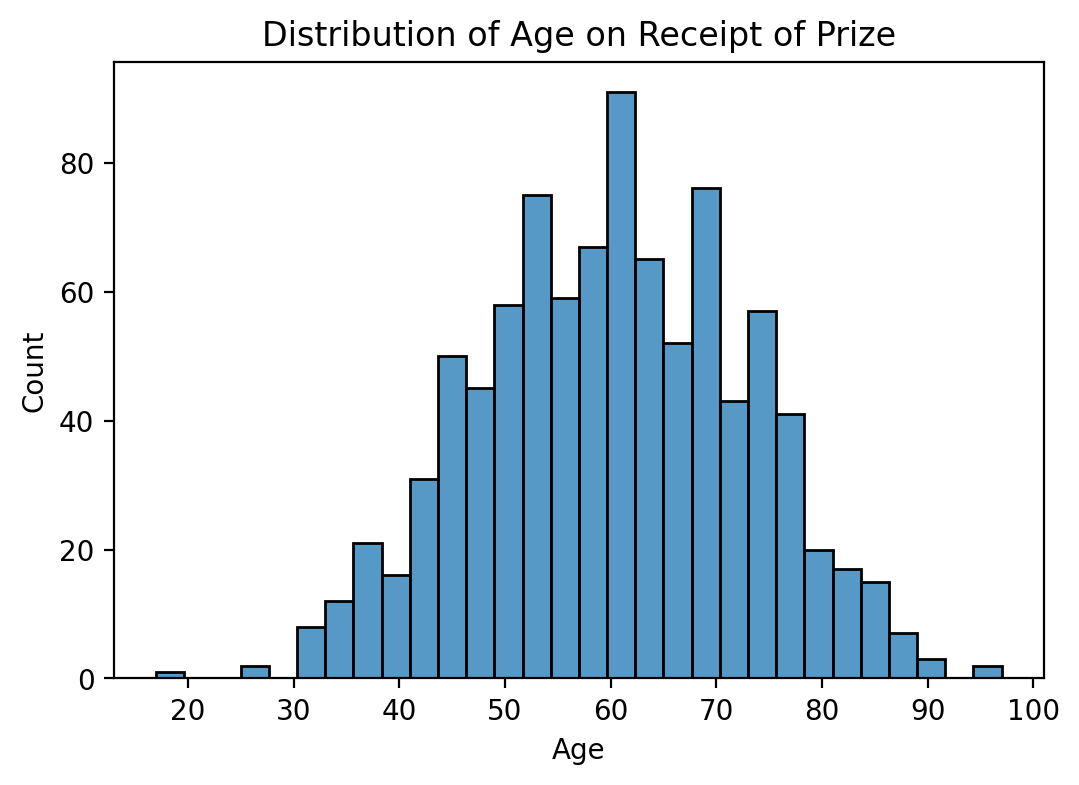

In [137]:
# ploting the histogram
plt.figure(figsize=(6,4), dpi=200)

sns.histplot(
    data= df_data,
    x= df_data.winning_age,
    bins=30,
)

plt.xlabel("Age")
plt.title("Distribution of Age on Receipt of Prize")
plt.show()

### Age at Time of Award throughout History

Are Nobel laureates being nominated later in life than before? Have the ages of laureates at the time of the award increased or decreased over time?

* Using Seaborn to [create a .regplot](https://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot) with a trendline.
* Setting the `lowess` parameter to `True` to show a moving average of the linear fit.
* According to the best fit line, how old were Nobel laureates in the years 1900-1940 when they were awarded the prize?
* According to the best fit line, what age would it predict for a Nobel laureate in 2020?


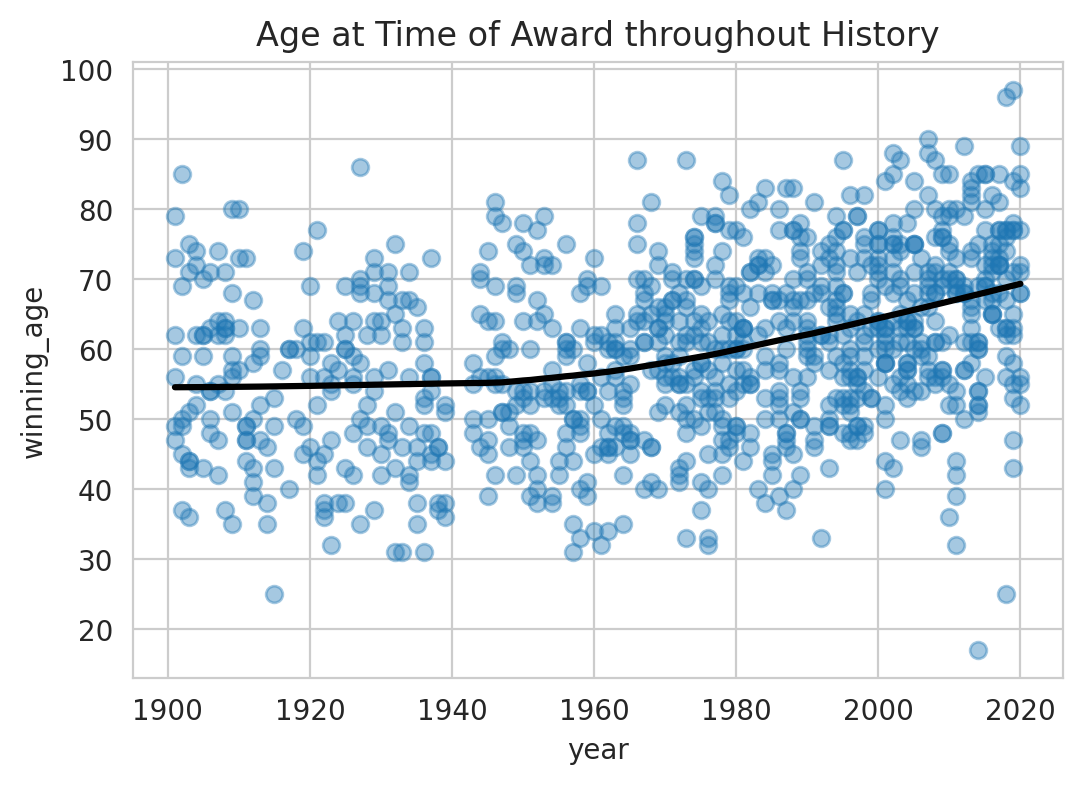

In [150]:
# ploting the regplot
plt.figure(figsize=(6,4), dpi=200)

with sns.axes_style('whitegrid'):
    ax = sns.regplot(
        data= df_data,
        x= 'year',
        y='winning_age',
        lowess=True,
        scatter_kws= {'alpha': 0.4},
        line_kws={'color': 'black'},
    )
    ax.set(
        title = "Age at Time of Award throughout History"
    )

plt.show()

### Winning Age Across the Nobel Prize Categories

How does the age of laureates vary by category? 

* Using Seaborn's [`.boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot) to show how the mean, quartiles, max, and minimum values vary across categories. Which category has the longest "whiskers"? 
* In which prize category are the average winners the oldest?
* In which prize category are the average winners the youngest?

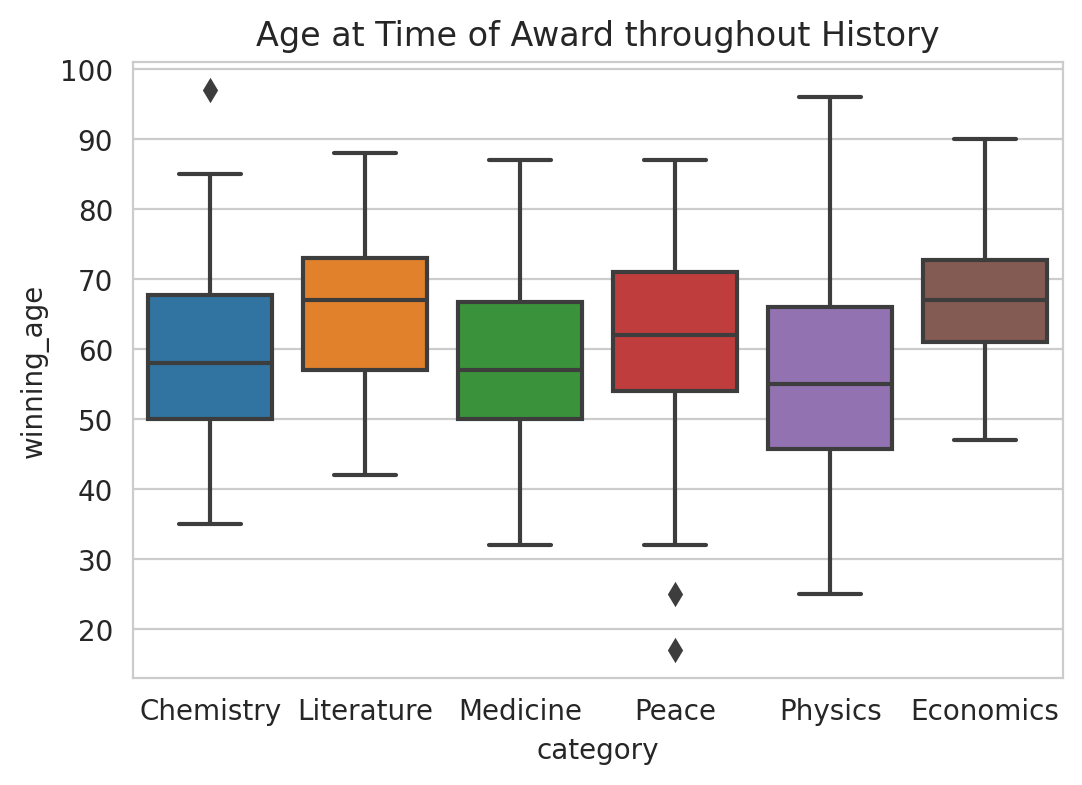

In [149]:
# ploting the boxplot
plt.figure(figsize=(6,4), dpi=200)

with sns.axes_style('whitegrid'):
    ax = sns.boxplot(
        data= df_data,
        x= 'category',
        y='winning_age',
    )
    ax.set(
        title = "Age at Time of Award throughout History"
    )

plt.show()


* Using Seaborn's [`.lmplot()`](https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot) and the `row` parameter to create 6 separate charts for each prize category. with `lowess` parameter `True`.
* What are the winning age trends in each category? 
* Which category has the age trending up and which category has the age trending down? 
* Is this `.lmplot()` telling a different story from the `.boxplot()`?
* Creating another chart with Seaborn. This time using `.lmplot()` to put all 6 categories on the same chart using the `hue` parameter. 


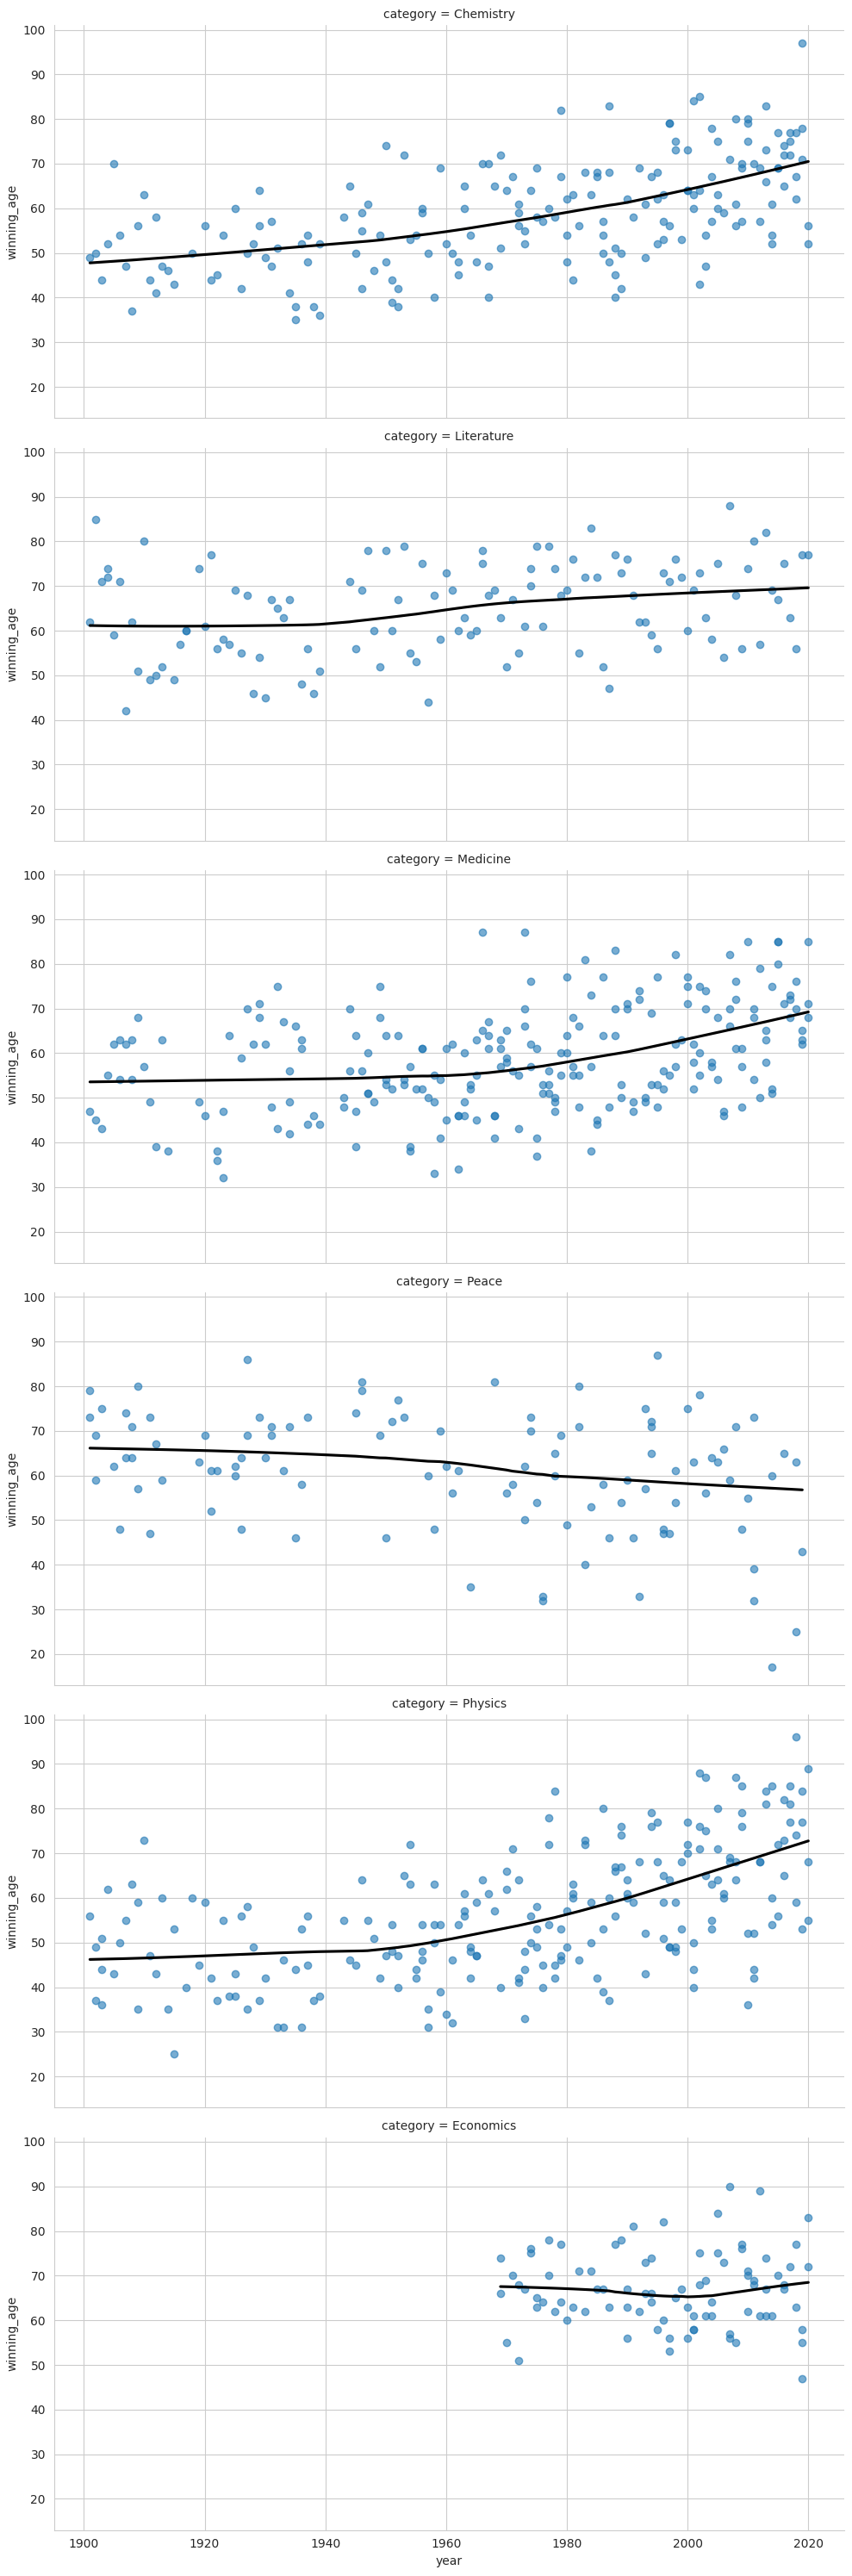

In [148]:
with sns.axes_style('whitegrid'):
    sns.lmplot(data=df_data,
               x='year', 
               y='winning_age',
               row = 'category',
               lowess=True, 
               aspect=2,
               scatter_kws = {'alpha': 0.6},
               line_kws = {'color': 'black'},)
 
plt.show()

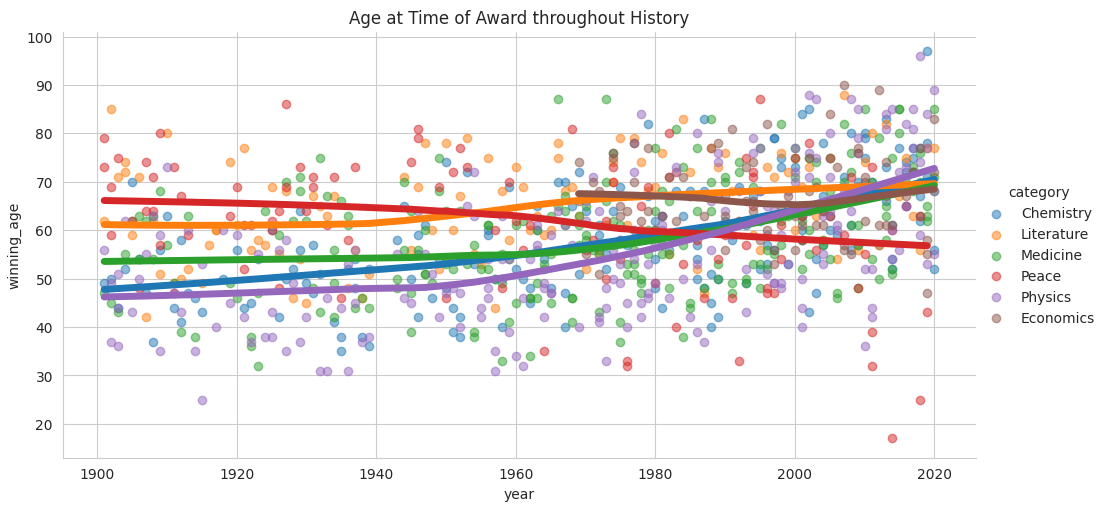

In [146]:
# combining all charts using hue parameter
with sns.axes_style('whitegrid'):
    ax =sns.lmplot(
        data=df_data,
        x='year', 
        y='winning_age',
        hue='category',
        lowess=True, 
        aspect=2,
        scatter_kws = {'alpha': 0.5},
        line_kws = {'linewidth': 5},
        )

    ax.set(
        title = "Age at Time of Award throughout History"
    )
 
plt.show()